Imports and set a seed:

In [37]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin
from astropy.table import Table, Row
from scipy.integrate import odeint, ode
from pyroots import Ridder
from scipy.optimize import root
np.random.seed(4664)

### Métodos Númericos para la Ciencia y la Ingenieria 

# <u>Tarea 3</u>
## Densidades de probabilidad, Método Monte Carlo, Métodos de Shooting , Resolución de Ecuaciones Diferenciales. 


### Victor Faraggi

### P1: Densidades de probabilidad, Método Monte Carlo

In [2]:
## wrapper function to use timeit module on a function with arguments

def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [3]:
## Classes used to create a table

class ParamsRow(Row):
    """
    Row class that allows access to an arbitrary dict of parameters
    stored as a dict object in the ``params`` column.
    """
    def __getitem__(self, item):
        if item not in self.colnames:
            return super().__getitem__('params')[item]
        else:
            return super().__getitem__(item)

    def keys(self):
        out = [name for name in self.colnames if name != 'params']
        params = [key.lower() for key in sorted(self['params'])]
        return out + params

    def values(self):
        return [self[key] for key in self.keys()]

class ParamsTable(Table):
    Row = ParamsRow

In [4]:
def method1(n):
    # se buscan generar n puntos
    while n > 0:
        # Usando densidades de probabilidad
        y1 = np.random.uniform(0,1)
        y2 = np.random.uniform(0,1)
        r = 0
        phi =  np.random.uniform(0, math.pi)
        return None

In [5]:
def methodºPlot():
    # se buscan los primeros 200 puntos dentro del circulo
    pointsX = []
    pointsY = []
    while len(pointsX) < 200:
        a = 0
    plt.plot(pointsX, pointsY, 'x')
    plt.title("Primeros 200 puntos al interior del círculo")
    plt.grid(True)

In [6]:
def method2(n):
    # se buscan generar n puntos
    while n > 0:
        # Monte Carlo
        while True:
            # se generan puntos en el cuadrado -1:1 centrado en 0
            x = np.random.uniform(-1,1)
            y = np.random.uniform(-1,1)
            
            # el punto esta en el circulo
            if(x**2 + y**2 <= 1):
                break
        
        n = n - 1
                
    # se generaron los n puntos

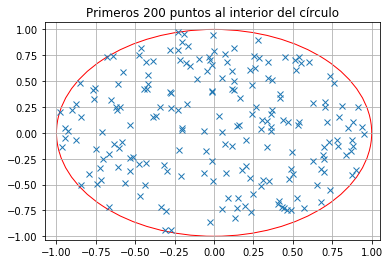

In [7]:
def method2Plot():
    # se buscan los primeros 200 puntos dentro del circulo
    pointsX = []
    pointsY = []
    while len(pointsX) < 200:
        while True:
            # se generan puntos en el cuadrado -1:1 centrado en 0
            x = np.random.uniform(-1,1)
            y = np.random.uniform(-1,1)
            
            # el punto esta en el circulo
            if(x**2 + y**2 <= 1):
                pointsX.append(x)
                pointsY.append(y)
                break
    circle = plt.Circle((0, 0), 1, color='r', fill=False)
    ax = plt.gca()
    ax.cla()
    ax.plot(pointsX, pointsY, 'x')
    ax.add_artist(circle)
    plt.title("Primeros 200 puntos al interior del círculo")
    ax.grid(True)
    
method2Plot()

In [8]:
def perfTest():
    '''
    print("Ejecutamos el metodo 1")
    print("Con 10^6 puntos")
    test1method1 = timeit.timeit(method1(10**6), number=3)
    print("El segundo metodo se demora: " + str(test1method2) + " segundos con 10^6 puntos")
    print("Con 10^7 puntos")
    test2method1 = timeit.timeit(method1(10*7), number=3)
    print("El segundo metodo se demora: " + str(test1method2) + " segundos con 10^7 puntos")          
    print("Con 10^8 puntos")
    test3method1 = timeit.timeit(method1(10**8), number=3)
    print("El segundo metodo se demora: " + str(test1method2) + " segundos con 10^8 puntos")          
    '''
    perfMethod1= [0, 0, 0]
    
    
    print("Ejecutamos el metodo 2")
    
    print("Con 10^6 puntos")
    wrapped = wrapper(method2, 10**6)
    test1method2 = timeit.timeit(wrapped, number=3)/3
    print("El segundo metodo se demora: " + str(test1method2) + " segundos con 10^6 puntos")
    
    print("Con 10^7 puntos")
    wrapped = wrapper(method2, 10**7)
    test2method2 = timeit.timeit(wrapped, number=3)/3
    print("El segundo metodo se demora: " + str(test2method2) + " segundos con 10^7 puntos")          
    
    print("Con 10^8 puntos")
    wrapped = wrapper(method2, 10**8)
    test3method2 = timeit.timeit(wrapped, number=3)/3
    print("El segundo metodo se demora: " + str(test3method2) + " segundos con 10^8 puntos")          
    
    perfMethod2= [test1method2, test2method2, test3method2]
    
    perf = [perfMethod1, perfMethod2]
    return perf
# We test the methods    
perf = perfTest()

Ejecutamos el metodo 2
Con 10^6 puntos
El segundo metodo se demora: 2.8716554166666666 segundos con 10^6 puntos
Con 10^7 puntos
El segundo metodo se demora: 27.78581375633333 segundos con 10^7 puntos
Con 10^8 puntos
El segundo metodo se demora: 274.49934184933335 segundos con 10^8 puntos


In [9]:
def plotResults(perf= perf):
    t = ParamsTable(names=['cantidad de puntos', 'tiempo método1', 'tiempo método2'], dtype=['i', 'f', 'f'])
    t.add_row((10**6, perf[0][0], perf[1][0]))
    t.add_row((10**7, perf[0][1], perf[1][1]))
    t.add_row((10**8, perf[0][2], perf[1][2]))
    print(t)
plotResults()

cantidad de puntos tiempo método1 tiempo método2
------------------ -------------- --------------
           1000000            0.0      2.8716555
          10000000            0.0      27.785814
         100000000            0.0      274.49933


Se puede apreciar que el uso de densidades de probabilidad es más eficiente para una cantidad **...** y el uso del método Monte Carlo es más eficiente para cantidades **...**.

Como no se realizó el método 1, por intuición, Monte Carlo debería ser más eficaz para cantidades menores de puntos.

Hay que recordar que usamos funciones para los dos métodos. Esto produce un tiempo de ejecución mayor a que si las soluciones estuvieran fuera de funciones. Esta última parte busca **comparar** la eficacia ambos métodos. Por esto se les compara en igualdad de condiciones: al interior funciones que son lo más simple posible.

Si lo que se busca es crear el código más eficiente para alguna solución: se recomienda que sea escrito fuera de funciones. Si el tiempo resultante sigue siendo mayor al buscado, se recomienda el uso de otros lenguaejes de programación como C o C++.

### P2: Métodos de Shooting

Se busca resolver la siguiente ecuación:
$$
y′′+2y′+3y^2 = 0 \space con \space y(0) = 0 \space y \space y(2) = −1.
$$

Simplificamos la ecuación de segundo orden a una de primer orden:

$$
y = x_0
\land
y' = x_1
\space
\implies
\space
x_1' + 2x_1 + 3x_0^2 = 0
$$


Así, resulta el siguiente sistema de ecuaciones:

$$
x_0' = x_1
$$

$$
x_1' = -2x_1 - 3x_0^2
$$

Así, las condiciones iniciales son las siguientes:

$$
y(0) = x_0(0) = 0
\\
\land
\\
y(2) = x_0(2) = -1
$$

In [10]:
# Definimos el sistema de ecuaciones
def f(x, t):
    return [x[1], - 2 * x[1] - 3 * x[0] ** 2]

# Definimos los boundaries
x_Init = 0.0 # coincide con y(0) = 0
x_End = 2.0

# Definimos el paso de integracion
h = 0.0001

Queremos encontrar el valor de $y'(0)$ para obtener un problema de condiciones iniciales. 

Para esto, se debe resolver un problema de raíces:

$$
y'(0) = \theta(u)
\\
\implies
\\
r(u) = \theta(u) - y(2) = 0
$$

Remplazando por el cambio de variable:

$$
r(u) = x_1(u) - x_0(2) = 0
$$

$$
r(u) = x_1(u) + 1 = 0
$$

La función $r$ se denomina límte residual de la ecuación diferencial.

Para resolver usamos el método de Ridder:

In [11]:
ridder = Ridder(epsilon=10**(-9))

In [12]:
# Resolvemos y'(0)
def r(u): 
    Y = odeint(f, [x_Init, 2.0], T)
    r = Y[-1].any() - 1.0
    return r

Ahora, definimos los valores estimados de $y'(0)$. Se asume que la función es suave y notamos que es decreciente:

In [13]:
estimacion1 = -0.5
estimacion2 = -1.5

Finalmente, procedemos con la resolución:

In [14]:
T = np.arange(x_Init, x_End, h)

xPrimaInit = ridder(r, estimacion1, estimacion2)

'''
Intento de solucionar con el paquete ode: 
En este se puede seleccionar que metodo de integración se usa. Dopri5 corresponde a Runge-Kutta 4.

s = ode(f)

s.set_integrator('dopri5')
s.set_initial_value(xPrimaInit.x0, x_Init)
X = [xPrimaInit.x0, x_Init]
while s.successful() and s.t < T[-1]:
    s.integrate(s.t + h)
    X.append(s.y)
'''
X  = odeint(f, [x_Init, xPrimaInit.x0], T)

Graficamos la solución

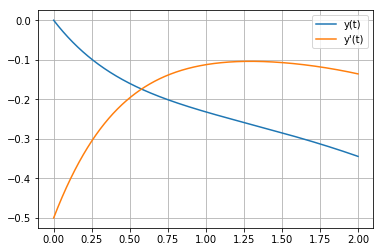

In [15]:
plt.plot(T,X[:,0],label="y(t)")
plt.plot(T,X[:,1],label="y'(t)")
plt.grid(True)
plt.legend()

Vale recordar que para la resolución de esta problema se busca implementar el *método de shooting*. Por esto para integrar y resolver el problema de raíces se usan librerias que incluyen métodos númericos ya implementados.

El método de Ridder fue visto en clases y *odeint* utiliza el método de *Real-valued Variable-coefficient Ordinary Differential Equation*.

Para más información referirse al siguiente sitio, apartado "lsoda": https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html

### P3: Resolución de Ecuaciones Diferenciales

Definimos los parámetros del problema:

In [16]:
# distancia recorrida
dist_recorrida = 8000

# gravedad
g = 9.81

# constante
c = 3.2*10**(-4)

# masa
m = 20

# tiempo de vuelo
t_final = 10

Se tienen en consideración:

$$
\vec{F}_{\rm D} = - c v^2 \hat{v}
\\
\land
\\
\vec{F}_{\rm g} = m \vec{g}
$$



La sumatoria de fuerzas queda:

$$
\sum \vec{F} = m \vec{g} - c v^2 \hat{v}
\\
\implies
\\
m\,\frac{d{\bf v}}{dt} = m\,{\bf g} - c\,{\bf v}^2,
$$

Donde ${\bf v} = (v_x, v_z)$ y  ${\bf g} = (0, -g)$
    
Así, se tiene:
<center>
$\displaystyle \frac{d{\bf v_x}}{dt}$	$\textstyle =$	$\displaystyle - c\,\frac{v_x}{v_t},$

<center>
$\displaystyle \frac{d {\bf v_z}}{dt}$	$\textstyle =$	$\displaystyle - g\left(1+\frac{v_z}{v_t}\right).$
</center>

Donde la velocidad al momento del impacto es: $v_t = m\,\frac{g}{c}$ 

Asimismo se conoce que las condiciones iniciales: $v_{x\,0} = v_0\,\cos\theta$ y $v_{z\,0}=v_0\,\sin\theta$, donde $v_0$ y $\theta$ no son conocidos.

Se busca determinar ${\bf v_x}$ y ${\bf v_x}$ pero no conoces las condiciones iniciales de sus derivadas. Para esto se utiliza el método de shooting.

In [19]:
# epsilon
epsilon = 10**(-3)

# velocidad al impacto

v_T = m * g/c

# Definimos los posibles valores del angulo (thetaMax = pi/2 - epsilon)
posible_Theta = np.arange(0, pi/2 - epsilon, 0.01)

# Definimos los posibles valores de la velocidad inicial (vMax = 8000/10)
posible_Velocidad_Init = np.arange(0, 800, 0.01)

# Así definimos las posibles velocidades iniciales
def vInitPosibles_X(vPosibles= posible_Velocidad_Init, thetaPosibles= posible_Theta):
    
    v_Init = np.zeros((vPosibles.shape[0], thetaPosibles.shape[0]))
    
    for vIndex,v in enumerate(vPosibles):
        for thetaIndex, theta in enumerate(thetaPosibles):
            v_Init[vIndex][thetaIndex] = v * cos(theta)
    
    return v_Init

def vInitPosibles_Z(vPosibles= posible_Velocidad_Init, thetaPosibles= posible_Velocidad_Init):
    
    v_Init = np.zeros((vPosibles.shape[0], thetaPosibles.shape[0]))
    
    for vIndex,v in enumerate(vPosibles):
        for thetaIndex, theta in enumerate(thetaPosibles):
            v_Init[vIndex][thetaIndex] = v * sin(theta)
    
    return v_Init

# Definimos las ecuaciones
def vXPrima(vX, t):
    return -c * vX / vT

def vZPrima(vZ, t):
    return -g * (1 + vZ/vT)

dist_Init = 0
dist_End = dist_recorrida

Se definen los límites residuales:

In [20]:
## ARREGLAR! --> SE DEBEN PROBAR TODAS LAS POSIBLES VELOCIDADES INICIALES Y DEVOLVER UN VECTOR CON 
##               LAS INTEGRACIONES CORRESPONDIENTES

def rX(u):
    vX = odeint(vXPrima, [0, 0], X)
    r = vX[-1].any() - 1.0
    return r

def rZ(u):
    vZ = odeint(vZPrima, [0, 0], X)
    r = vZ[-1].any() - 1.0
    return r

Ahora, se realizan las estimaciones de los valores iniciales de $\dot{\bf v_x}$ y $\dot{\bf v_z}$

In [21]:
## SE DEBEN REALIZAR ESTIMACIONES CORRECTAS

guess_Vx_Prima = 0

guess_Vz_Prima = 0

Finalmente, resolvemos:

In [27]:
X = np.arange(dist_Init, dist_End, 0.01)

## Se definen los posibles valores iniciales de las velocidades
def posibles_Vx_Prima_Init():
    rX = rX
    roots_Vx = []
    for i in rX:
        roots_Vx = root(i, guess_Vx_Prima)
        
    return roots_Vx
    
def posibles_Vz_Prima_Init():
    rZ = rZ
    for i in rZ:
        roots_Vz = root(i, guess_Vz_Prima)
        
    return roots_Vz

def res(): 
    ## Se resuelve para las posibles todas condiciones iniciales
    condiciones_Init_X = vInitPosibles_X()
    condiciones_Init_X_Derivada = posibles_Vx_Prima_Init()

    condiciones_Init_Z = vInitPosibles_Z()
    condiciones_Init_Z_Derivada = posibles_Vz_Prima_Init()

    ## Se inicializan los vectores velocidad en X y en Z
    vX = np.zeros((condiciones_Init_X.shape[0], condiciones_Init_X_Derivada.shape[0]))
    vZ = np.zeros((condiciones_Init.shape[0], condiciones_Init_X_Derivada.shape[0]))


    ## Se resuelve la velocidad en X
    for cond_X_Index, cond_X in enumerate(condiciones_Init_X):
        for cond_X_Prima_Index, cond_X_Derivada in enumerate(condiciones_Init_X_Derivada):
        
            ## calcula valor y lo incluye en las posibles soluciones
            res = odeint(vXPrima, [cond_X_Index, cond_X_Derivada], X)
            vX[cond_X_Index][cond_X_Prima_Index] = res
        
        
    ## Se resuelve la velocidad en Z
    for cond_Z_Index, cond_Z in enumerate(condiciones_Init_Z):
        for cond_Z_Prima_Index, cond_Z_Derivada in enumerate(condiciones_Init_Z_Derivada):
        
            ## calcula valor y lo incluye en las posibles soluciones
            res = odeint(vXPrima, [cond_Z, cond_Z_Derivada], X)
            vX[cond_X_Index][cond_X_Prima_Index] = res
    
    return vX, vZ

Ahora que se tienen todas las posibles soluciones, basta ver cuál permite que la distancia recorrida sea de 8000 metros. Al conocer esto, se puede obtener la velocidad inicial y ángulo correspodiente a través de su posición en la matriz:

Supongamos que ya se determinó la solución, sea *vX_Sol* y *vZ_Sol*. De esta manera, sean *i_x*, *j_x*, *i_z* y *j_z* sus correspondientes índices en *vX* y *vZ*.

Así, se puede realizar lo siguiente:

1. Encontrar la posición de las condiciones iniciales usadas para el valor de $i_x$, $i_z$
2. Para esto, se debe verificar la matriz con todas las posibles velocidad iniciales para x y z
3. Se obtienen estos nuevos índices: $i_x'$, $j_x'$, $i_z'$ y $j_z'$
4. La velocidad inicial es: posible_Velocidad_Init[$i_x'$]
5. El angulo inicial es: posible_Theta[$j_x'$]

### P4: Resolución de Ecuaciones Diferenciales.

Se decide utilizar Lagrangiano para obtener las ecuaciones de movimiento.

Así, para el bloque $W1$ se tiene la siguiente ecuación:

$$
\begin{aligned}
L &= \frac{1}{2} (m_1 \cdot \dot{x_1}^2 + m_2 \cdot \dot{x_2}^2 + m_3 \cdot \dot{x_3}^2) \\
& - m_1 g  x_1 - m_2  g  x_2 - m_3  g  x_3 \\
& - \frac{1}{2} k_1 x_1^2 - \frac{1}{2} k_2 x_1^2 \\
& - \frac{1}{2} k_3 (x_2 - x_1)^2 - \frac{1}{2} k_4 (x_3 - x_2)^2 - \frac{1}{2} k_5 (x_3 - x_4)^2
\end{aligned}   
$$

Así, se obtiene el siguiente sistema de ecuación matricial:

$$
\dot{X} = A \cdot X + C
$$

Donde las matrices son las siguientes:

$$
A=
  \begin{bmatrix}
    \frac{-k_1}{m_1}-\frac{k_3}{m_1}-\frac{k_5}{m_1} & \frac{-k_2}{m_1}+\frac{k_3}{m_1} & \frac{k_5}{m_1} \\
    \frac{k_3}{m_2} & \frac{-k_2}{m_2}+\frac{k_3}{m_2} & \frac{k_4}{m_2} \\
    \frac{k_5}{m_3} & \frac{k_4}{m_3} & \frac{-k_4}{m_3}+\frac{k_5}{m_3}
  \end{bmatrix}
$$

$$
X= 
  \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3
   \end{bmatrix}
$$

$$
C= 
  \begin{bmatrix}
    -g \\
    -g \\
    -g
   \end{bmatrix}
$$

Por datos del problema se tiene que las siguiente relaciones:
1. $m = m_1 = m_2 = 80/g$ gr y $m_3 = 40/g$ gr
2. $k = k1 =k3 =k4 =1000$ N/m
3. $z = k2 =k5 =2000$ N/m

Como el sistema está en equilibrio, entonces $\dot{X} = 0$.

Así, el sistema queda:

$$
A \cdot X = - C
$$

In [34]:
## Se ingresan los datos del problema:

# pesos
w = 80
w3 = 40

# constantes elasticas
k = 1000
z = 2000

g = 9.81

In [60]:
# se inicializan las matrices
def matrices():
    C = np.zeros((3,1))
    A = np.zeros((3,3))
    
    C[:,:] = g
    
    m = w/g
    m3 = w3/g
    
    A[0,0]= -k/m - k/m - z/m
    A[1,0]= x = -k / m
    A[2,0]= x = -z / m3
    
    A[0,1]=-z/m + k/m
    A[1,1]=-z/m + k/m
    A[2,1]=k/m3
    
    
    A[0,2]=z/m
    A[1,2]=k/m
    A[2,2]=-k/m3 + z/m3
    return C,A

Se obtenienen las matrices, se invierte $A$ y se resuelve:

In [65]:
C, A = matrices()
print("La matriz -C:")
print(C)
print()

print("La matriz A:")
print(A)
print()


print("Su inversa:")
A_inversa = np.linalg.inv(A)
print(A_inversa)
print()

## Se tiene A^-1 * A * X = A^-1 * C

print("Se resuelve:")
sol = np.matmul(A_inversa, C)

print(sol)

La matriz -C:
[[9.81]
 [9.81]
 [9.81]]

La matriz A:
[[-490.5   -122.625  245.25 ]
 [-122.625 -122.625  122.625]
 [-490.5    245.25   245.25 ]]

Su inversa:
[[-0.00543663  0.00815494  0.00135916]
 [-0.00271831  0.          0.00271831]
 [-0.00815494  0.01630989  0.00407747]]

Se resuelve:
[[0.04]
 [0.  ]
 [0.12]]


Así, se tiene los siguientes desplazamientos para cada bloque:

$$
x_1 = 0.04 [m]
$$

$$
x_2 = 0.0 [m]
$$

$$
x_3 = 0.12 [m]
$$


